# Upgrade pandas and sklearn packages to latest versions

In [1]:
# Upgrade pandas to latest version
#!pip install pandas --upgrade
# Upgrade scikit-learn to latest version
#!pip install sklearn --upgrade

# Import packages and verify versions

In [2]:
import pandas as pd
import sklearn
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The pandas version is 0.21.0.
The scikit-learn version is 0.19.1.


# Load data

In [3]:
url_customers = 'https://ibm.box.com/shared/static/gwak77ibs1zy7i5foza03f9u7zcdgn6j.csv'
url_transactions = 'https://ibm.box.com/shared/static/zjx66wjdtl02gi9rr2nmal2po4eqaxtc.csv'

In [4]:
customers = pd.read_table(url_customers,sep=',')
transactions = pd.read_table(url_transactions,sep=',')

In [5]:
customers.columns = [col.replace(' ', '') for col in customers.columns]
transactions.columns = [col.replace(' ', '') for col in transactions.columns]

In [6]:
pd.set_option('display.max_columns', None)
customers.head()

,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange
0,787,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22
1,789,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22
2,1,NaN,No,No,Yes,No,Female,Widowed,No,Yes,Yes,17 to 22
3,2,NaN,No,Yes,No,No,Female,Separated,No,Yes,Yes,17 to 22
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22


In [7]:
transactions.head()

,CustomerID,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
0,787,7,117.393407,1,1,55541,T
1,789,7,117.393407,1,six,1,T
2,1,6,137.165304,1,2,2,F
3,2,8,72.997904,1,1,3,F
4,3,13,105.156650,1,2,3,F


In [8]:
print('Number of rows in customers = {}'.format(customers.CustomerID.count()))
print('Number of rows in trips = {}'.format(transactions.CustomerID.count()))

Number of rows in customers = 788
Number of rows in trips = 788


# Join Data

In [9]:
joined = customers.join(transactions.set_index('CustomerID'), on='CustomerID', how='inner').reset_index(drop=True)

In [10]:
print('Number of rows in joined = {}'.format(joined.CustomerID.count()))
joined.head()

Number of rows in joined = 788


,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
0,787,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22,7,117.393407,1,1,55541,T
1,789,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22,7,117.393407,1,six,1,T
2,1,NaN,No,No,Yes,No,Female,Widowed,No,Yes,Yes,17 to 22,6,137.165304,1,2,2,F
3,2,NaN,No,Yes,No,No,Female,Separated,No,Yes,Yes,17 to 22,8,72.997904,1,1,3,F
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22,13,105.156650,1,2,3,F


# Data Cleansing

In [11]:
joined[['Frequency_score']] = joined[['Frequency_score']].apply(pd.to_numeric, errors='coerce')

In [12]:
#joined.drop('Retire', axis=1, inplace=True)
#joined.drop('Frequency_score', axis=1, inplace=True)
joined = joined.dropna(axis=0)
print('Number of rows in joined = {}'.format(joined.CustomerID.count()))

Number of rows in joined = 761


In [13]:
joined[['Frequency_score']] = joined[['Frequency_score']].astype(int)

In [14]:
joined[['Monetary_score']] = joined[['Monetary_score']]<= 200

In [15]:
joined.head()

,CustomerID,Retire,Invest,Educ,Mortgage,LOC,GENDER,MARITAL,CHILDREN,WORKING,HighMonVal,AgeRange,TimeYears,lasttrans,current,Frequency_score,Monetary_score,Churn
0,787,0.0,No,No,No,No,Male,Single,No,Yes,No,17 to 22,7,117.393407,1,1,False,T
4,3,1.0,No,Yes,Yes,No,Male,Single,No,Yes,No,17 to 22,13,105.156650,1,2,True,F
5,4,1.0,No,No,No,No,Female,Widowed,No,Yes,Yes,17 to 22,7,75.530619,1,2,True,F
6,5,1.0,No,No,No,No,Female,Separated,No,Yes,No,17 to 22,13,86.580787,1,1,True,F
7,6,1.0,No,No,Yes,Yes,Male,Single,No,No,No,17 to 22,11,122.074913,1,3,True,F


In [16]:
joined.dtypes

CustomerID           int64
Retire             float64
Invest              object
Educ                object
Mortgage            object
LOC                 object
GENDER              object
MARITAL             object
CHILDREN            object
WORKING             object
HighMonVal          object
AgeRange            object
TimeYears            int64
lasttrans          float64
current              int64
Frequency_score      int64
Monetary_score        bool
Churn               object
dtype: object

# Drop Columns not being used as Features

In [17]:
dropCols = (['CustomerID', 'Invest', 'Educ', 'MARITAL', 'TimeYears', 'lasttrans', 'current', 'Monetary_score'])
joined.drop(dropCols, axis=1, inplace=True)

# Convert numeric data to integer (some numeric columns were inferred as float64)

In [18]:
joinedColNames = joined.columns.values.tolist()
intList = []
numericCols = []
for col in joinedColNames:
    if joined[col].dtypes == 'float64' or joined[col].dtypes == 'int64':
        numericCols.append(col)
        intList.append('int')
# Create a dictionary that will be used to set the numeric columns to integer type
intDict = dict(zip(numericCols, intList))
intDict

{'Frequency_score': 'int', 'Retire': 'int'}

In [19]:
# Conert the numeric columns to integer
joined = joined.astype(intDict)
# All numeric data is now int64

# Encode the string data

In [20]:
joined.columns.values

array(['Retire', 'Mortgage', 'LOC', 'GENDER', 'CHILDREN', 'WORKING',
       'HighMonVal', 'AgeRange', 'Frequency_score', 'Churn'], dtype=object)

In [21]:
# Import LabelEncoder and initialize it
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
# Encode the entire DataFrame before splitting the data into training and test sets
joinedColNames = joined.columns.values.tolist()
for col in joinedColNames:
    # Encode only the categorical columns
    if joined[col].dtypes == 'object':
        lenc.fit(joined[col])
        joined[col+'.t']=lenc.transform(joined[col])
        joined = joined.drop(col, axis = 1)
joined.rename(columns=lambda x: x.replace('.t', ''), inplace=True)

# Prepare the data for machine learning

In [22]:
# Create features and label dataframes
X = joined.drop('Churn', axis = 1)
y = joined.Churn

In [23]:
# Sample the indexed DataFrame
X.sample(n=5, random_state=2)

,Retire,Frequency_score,Mortgage,LOC,GENDER,CHILDREN,WORKING,HighMonVal,AgeRange
265,0,4,1,1,1,1,0,0,3
364,1,5,1,1,1,0,1,1,3
672,0,5,1,0,0,0,1,0,1
317,1,3,1,1,0,0,1,1,1
72,1,3,0,0,1,0,1,1,0


# Create training and test datasets¶

In [24]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
# Show the number of rows in each data set
print('Number of rows in X_train is {}.'.format(X_train.shape[0]))
print('Number of rows in X_test is {}.'.format(X_test.shape[0]))
print('Number of rows in y_train is {}.'.format(y_train.shape[0]))
print('Number of rows in y_test is {}.'.format(y_test.shape[0]))

Number of rows in X_train is 684.
Number of rows in X_test is 77.
Number of rows in y_train is 684.
Number of rows in y_test is 77.


# Train the model

In [26]:
#import required modules from the scikit-learn metrics package
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [66]:
#Import XGBoost
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
#model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [59]:
# List the default parameters.
#print(model.get_xgb_params())

{'colsample_bytree': 1, 'scale_pos_weight': 1, 'reg_lambda': 1, 'learning_rate': 0.1, 'max_delta_step': 0, 'reg_alpha': 0, 'colsample_bylevel': 1, 'silent': 1, 'n_estimators': 100, 'min_child_weight': 1, 'seed': 0, 'gamma': 0, 'missing': None, 'subsample': 1, 'base_score': 0.5, 'objective': 'binary:logistic', 'max_depth': 3}


In [67]:
model.fit(X_train, y_train, eval_metric=['error'], eval_set=[((X_train, y_train)),(X_test, y_test)])

[0]	validation_0-error:0.219298	validation_1-error:0.194805
[1]	validation_0-error:0.211988	validation_1-error:0.181818
[2]	validation_0-error:0.216374	validation_1-error:0.181818
[3]	validation_0-error:0.216374	validation_1-error:0.181818
[4]	validation_0-error:0.187135	validation_1-error:0.155844
[5]	validation_0-error:0.184211	validation_1-error:0.155844
[6]	validation_0-error:0.162281	validation_1-error:0.12987
[7]	validation_0-error:0.163743	validation_1-error:0.12987
[8]	validation_0-error:0.159357	validation_1-error:0.155844
[9]	validation_0-error:0.162281	validation_1-error:0.116883
[10]	validation_0-error:0.165205	validation_1-error:0.116883
[11]	validation_0-error:0.162281	validation_1-error:0.116883
[12]	validation_0-error:0.162281	validation_1-error:0.12987
[13]	validation_0-error:0.162281	validation_1-error:0.12987
[14]	validation_0-error:0.156433	validation_1-error:0.142857
[15]	validation_0-error:0.152047	validation_1-error:0.155844
[16]	validation_0-error:0.154971	valid

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [68]:
print(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [69]:
# setup for plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
eval = model.evals_result()
eval_steps = range(len(eval['validation_0']['error']))

Text(0.5,0,'Number of iterations')

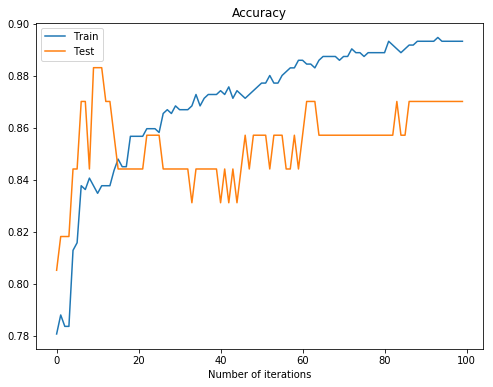

In [72]:
# Plot and display the performance evaluation
eval = model.evals_result()
eval_steps = range(len(eval['validation_0']['error']))

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps, [1-x for x in eval['validation_0']['error']], label='Train')
ax.plot(eval_steps, [1-x for x in eval['validation_1']['error']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations')

In [73]:
# Select trained model.
n_trees = 10
y_pred = model.predict(X_test, ntree_limit= n_trees)

In [74]:
# Check the accuracy of the trained model.
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.1f%%" % (accuracy * 100.0))

Accuracy: 88.3%


# Make predicitons

In [75]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Check model accuracy

In [76]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.01%


# Save and Deploy Model

In [87]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [88]:
wml_credentials = {
    "url": "https://ibm-watson-ml.mybluemix.net",
    #"access_key": "",
    "username": "4be82790-d71b-4c9f-ac4e-5af3c4b9c9b1",
    "password": "47571902-8632-47e8-9590-323f49975136",
    "instance_id": "d360e86c-6ddd-45f7-a908-d1ebf83a211d"
}

In [89]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [97]:
model_props = {client.repository.ModelMetaNames.NAME: "XGBoost model for Retail Churn"}
#model_details = client.repository.store_model(pipeline, model_props)
model_details = client.repository.store_model(model, model_props)

In [98]:
# Display a list of all the models.
client.repository.list_models()

------------------------------------  ------------------------------  ------------------------  -----------------
GUID                                  NAME                            CREATED                   FRAMEWORK
371d41a1-cf31-41a5-8d30-b5a32a4f12ee  RetailChurn                     2018-06-26T21:43:38.280Z  spss-modeler-18.1
5d773b87-8401-4f7a-a634-a1b3ef7aa7e9  Telco_Churn_SKL_model           2018-07-24T00:26:42.074Z  scikit-learn-0.19
1960df30-95cc-4f97-9e31-681c738ae640  Telco_Churn_SKL_model           2018-07-24T00:49:41.877Z  scikit-learn-0.19
1675d3bc-beed-4c6a-819a-e35d4b591c5d  XGBoost model for Retail Churn  2018-07-24T16:05:10.478Z  scikit-learn-0.19
------------------------------------  ------------------------------  ------------------------  -----------------


In [99]:
# Extract the uid.
model_uid = client.repository.get_model_uid(model_details)
print(model_uid)

1675d3bc-beed-4c6a-819a-e35d4b591c5d


In [100]:
# Create the deployment.
deployment_details = client.deployments.create(model_uid, 'Predict Churn with XGBoost')



#######################################################################################

Synchronous deployment creation for uid: '1675d3bc-beed-4c6a-819a-e35d4b591c5d' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f43c176a-a88e-465e-ae03-2f5196641453'
------------------------------------------------------------------------------------------------




In [101]:
# List the deployments.
client.deployments.list()

------------------------------------  --------------------------  ------  --------------  ------------------------  -----------------
GUID                                  NAME                        TYPE    STATE           CREATED                   FRAMEWORK
3f50d932-b001-4e7d-b351-086249f2880a  Predict_Telco_Churn         online  DEPLOY_SUCCESS  2018-07-24T00:27:56.830Z  scikit-learn-0.19
86a0da67-b85b-4b3f-b035-2f7bdae2d5c2  RetailChurn                 online  DEPLOY_SUCCESS  2018-07-12T17:44:13.055Z  spss-modeler-18.1
d8032722-dbb1-478f-8d2b-33a81d6f088d  Predict_Telco_Churn         online  DEPLOY_SUCCESS  2018-07-24T00:49:58.321Z  scikit-learn-0.19
f43c176a-a88e-465e-ae03-2f5196641453  Predict Churn with XGBoost  online  DEPLOY_SUCCESS  2018-07-24T16:05:26.221Z  scikit-learn-0.19
------------------------------------  --------------------------  ------  --------------  ------------------------  -----------------


In [106]:
deployment_details

{'entity': {'deployable_asset': {'created_at': '2018-07-24T16:05:26.202Z',
   'guid': '1675d3bc-beed-4c6a-819a-e35d4b591c5d',
   'name': 'XGBoost model for Retail Churn',
   'type': 'model',
   'url': 'https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/published_models/1675d3bc-beed-4c6a-819a-e35d4b591c5d'},
  'deployed_version': {'guid': '4da236b0-c049-4eef-a6c5-80fef9294c95',
   'url': 'https://ibm-watson-ml.mybluemix.net/v3/ml_assets/models/1675d3bc-beed-4c6a-819a-e35d4b591c5d/versions/4da236b0-c049-4eef-a6c5-80fef9294c95'},
  'description': 'Description of deployment',
  'model_type': 'scikit-learn-0.19',
  'name': 'Predict Churn with XGBoost',
  'runtime_environment': 'python-3.5',
  'scoring_url': 'https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/deployments/f43c176a-a88e-465e-ae03-2f5196641453/online',
  'status': 'DEPLOY_SUCCESS',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'type': 'online'}

In [105]:
# Extract endpoint url and display it.
scoring_url = client.deployments.get_scoring_url(deployment_details)
print(scoring_url)

UnexpectedType: Unexpected type of 'details', expected: 'deployment_details_type', actual: 'unknown_type'.

In [110]:
scoring_url = 'https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/deployments/f43c176a-a88e-465e-ae03-2f5196641453/online'

In [111]:
# Prepare scoring payload.
payload_scoring = {"values": [X_test.iloc[0].tolist()]}
print(payload_scoring)

{'values': [[0, 4, 0, 0, 0, 0, 1, 1, 1]]}


In [112]:
# Perform prediction and display the result.
response_scoring = client.deployments.score(scoring_url, payload_scoring)
print(response_scoring)

{'values': [[0, [0.8119363784790039, 0.18806365132331848]]], 'fields': ['prediction', 'probability']}


In [123]:
# Print the confusion matrix for Logistic Regression analysis
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22  7]
 [ 3 45]]


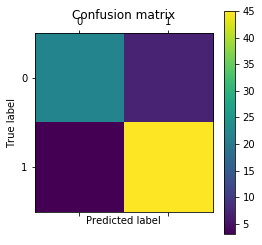

In [124]:
# Plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

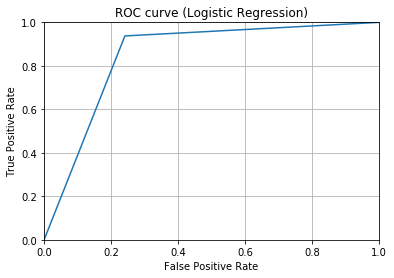

In [125]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [62]:
# Print out AUC, the percentage of the ROC plot that is underneath the curve
print('AUC using XGBoost = {:.2f}'.format(roc_auc_score(y_test, y_pred)))

AUC using XGBoost = 0.85


In [37]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation for Logistic Regression
lreg_avg_cross_val_score = cross_val_score(lreg, X, y, cv=10, scoring='roc_auc').mean()
print('Cross-validated AUC for Logistic Regression = {:.2f}'.format(lreg_avg_cross_val_score))

Cross-validated AUC for Logistic Regression = 0.81


# Hyperparamater Tuning¶

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# create lists of the parameter values that should be searched
# The penalty parameter is used to specify the norm used in the penalization
penaltyList = ['l1', 'l2']
#The C parameter is the inverse of regularization strength, must be a positive float, smaller values specify stronger regularization
Crange = [float(i)/10 for i in (list(range(1,10,1)))]
#Created a range of positive, float C values to search

In [40]:
# create a parameter grid by mapping the parameter names to the values/list that should be searched
param_grid = dict(penalty = penaltyList, C = Crange)
print(param_grid)

{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'penalty': ['l1', 'l2']}


In [41]:
# instantiate and fit the grid
grid = GridSearchCV(lreg, param_grid, cv=3, scoring='roc_auc')
grid.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [42]:
# examine the best model
print('Best AUC for Logistic Regression = {:.2f}'.format(grid.best_score_))
print('')
print('Parameters for Best AUC for Logistic Regression = {}'.format(grid.best_params_))
print('')
print('Full list of paramemters for best estimator for Logistic Regression:\n {}'.format(grid.best_estimator_))

Best AUC for Logistic Regression = 0.81

Parameters for Best AUC for Logistic Regression = {'C': 0.1, 'penalty': 'l1'}

Full list of paramemters for best estimator for Logistic Regression:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
